This is a template notebook for the third coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Note that you may add other cells.
Failure to comply may result in unexpected errors that can lead to mark deductions.


##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---------
---------
 
 1.) Linear models and residuals

--------
--------

Run the next cell to load the first dataset.

--------




In [2]:
X = pd.read_csv('1.csv',sep=' ')
X.head()

,x,y
0,-1.167390,-40.099714
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918


----

a.) Use _numpy.polyfit()_ to fit a linear model to the data, storing the parameters into variables called _m_ and _b_ respectively for the slope and y-intercept. 

----

In [3]:
x = X['x']
y = X['y']
m,b = np.polyfit(x,y,1)
m,b

(6.523699151548956, -8.234591505946511)

----

b.) Compute the residual of the data with respect to the model and store them in a variable called _res_

----

In [4]:
yd = m*x + b
res = y - yd

----

c.) Plot an unnormalised histogram of the residuals with 40 bins

----

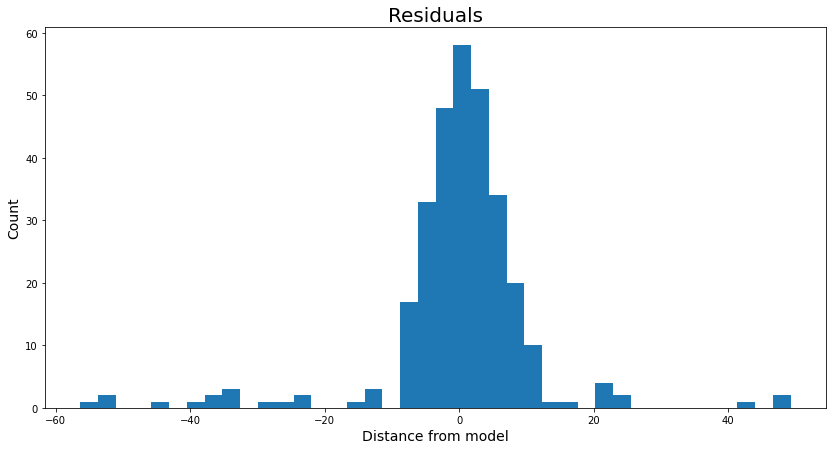

In [5]:
plt.figure(figsize=(14,7))
plt.hist(res,bins=40);
plt.title('Residuals',size=20);
plt.ylabel('Count',size=14);
plt.xlabel('Distance from model',size=14);

In [6]:
print("Correlation between x and y:", x.corr(y))
print("Correlation between x and residuals:", x.corr(res))

Correlation between x and y: 0.31609809632848895
Correlation between x and residuals: 1.0167320424150448e-16


----

e.) Complete the function below to compute hinges of the input x, which should be set at the 30th and 70th quantile.

----

In [7]:
def hinges(x):
    upper = x.quantile(q=0.7)
    lower = x.quantile(q=0.3)
    return lower,upper

----

f.) Use the above function to compute the inner fences of the residuals. Store the results in the variables _lower_fence_ and _upper_fence_ respectively.

----

In [8]:
Q1,Q3 = hinges(res)
step = Q3 - Q1
inner_lower_fence = Q1 - 1.5*step
inner_upper_fence = Q3 + 1.5*step
inner_lower_fence,inner_upper_fence

(-10.330844508526177, 12.019837585630624)

----

g.) Create a new Dataframe called _Y_ with all the values corresponding to residuals which are beyond the inner fences removed.

----

In [10]:
Y=X.copy()

# Index for values which fall between the fences
index_between = res.between(inner_lower_fence,inner_upper_fence)

# Residual values that correspond to each value of x and y, which fall within the fences
Y['Residuals Between'] = res[index_between]
Y.dropna(inplace=True)

In [12]:
Y.head()

,x,y,Residuals Between
1,-1.082710,-19.151187,-3.853320
2,-1.063447,-16.397238,-1.225035
3,-1.061148,-11.336125,3.821077
4,-0.993360,-19.188918,-4.473942
5,-0.990390,-17.154749,-2.459149


----

h.) Fit a new linear model and plot the  outliers as red points, the remainder of the points (non-outliers) as blue stars (\*), the original model as a black line and the new model shown as a green line. Store the new model parameters in the variables _m\_new_ and _b\_new_.

----

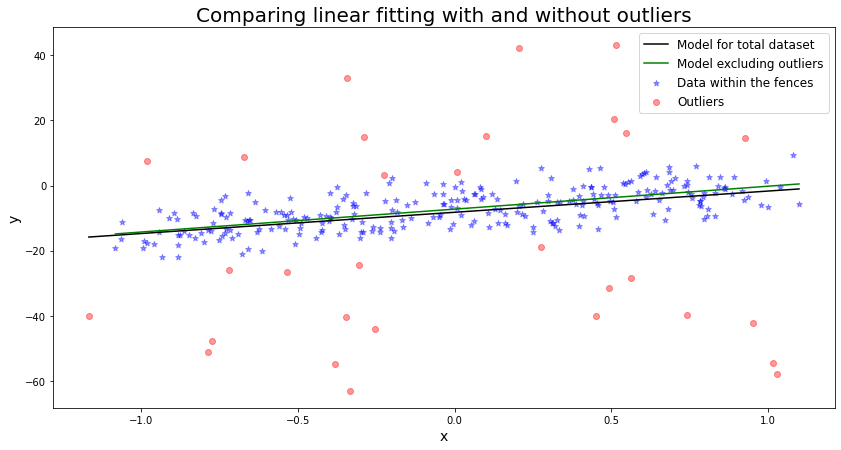

In [13]:
plt.figure(figsize=(14,7))

# Index values for the outliers
index_lower_outliers = res.lt(inner_lower_fence)
index_upper_outliers = res.gt(inner_upper_fence)

# Values for x and y which fall within the fences
x_between = Y['x']
y_between = Y['y']

# Finding the values of x and y corresponding to the outliers
x_outliers = x[index_lower_outliers].append(x[index_upper_outliers]) 
y_outliers = y[index_lower_outliers].append(y[index_upper_outliers]) 

# New line of best fit excluding outliers
m_new,b_new = np.polyfit(x_between,y_between,1)
yd_new = m_new*x_between + b_new


# Plotting all of the functions into one graph
plt.scatter(x_between,y_between,marker='*',color='blue',alpha=0.4,label="Data within the fences");
plt.scatter(x_outliers,y_outliers,color='red',alpha=0.4, label="Outliers");
plt.plot(x,yd,color='black',label="Model for total dataset");
plt.plot(x_between,yd_new,color='green',label="Model excluding outliers");
plt.title('Comparing linear fitting with and without outliers',size=20);
plt.xlabel('x',size=14);
plt.ylabel('y',size=14);
plt.legend(loc='upper right',fontsize=12);

### 2.)

The next dataset is on the sales of video games. 

---------
---------

a.) Use pandas to read in the file **games.csv** into a dataframe called _games_



In [14]:
games = pd.read_csv('2.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



 ----
 
a.) Find answers to the following questions about the dataframe.
- How many genres are there? Store the answer in a variable called _num_genres_. 
- How many publishers are there? Store the answer in a variable _num_publishers_.
- How many platforms are there? Store the answer in a variable _num_platforms_.

----


In [15]:
num_genres = games['Genre'].nunique()
num_publishers = games['Publisher'].nunique()
num_platforms = games['Platform'].nunique()

----

b.) Create a box-and-whisker plot of Global Sales by genre.

----

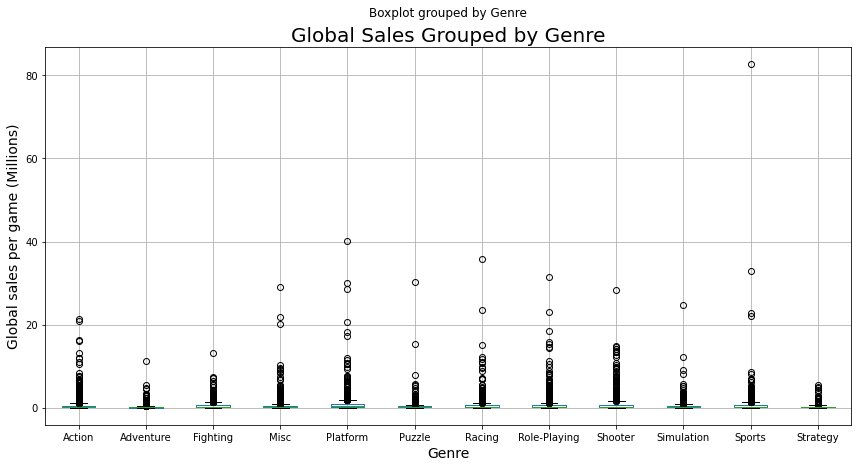

In [16]:
games.boxplot(column = 'Global_Sales', by = 'Genre', figsize=(14,7));
plt.title('Global Sales Grouped by Genre',size=20);
plt.ylabel('Global sales per game (Millions)',size=14);
plt.xlabel('Genre',size=14);

----

c.) Find the upper outer fence thresholds for each genre (assuming hinges at the 25th and 75th percentile). Store them in a dictionary {genre:upper outer fence} called ufence.

---

In [17]:
LQ = games.groupby('Genre')['Global_Sales'].quantile(q=0.25)
UQ = games.groupby('Genre')['Global_Sales'].quantile(q=0.75)
step = UQ - LQ
upper_outer = UQ + 3*step
ufence = upper_outer.to_dict()
ufence

{'Action': 1.79,
 'Adventure': 0.5800000000000001,
 'Fighting': 1.9600000000000002,
 'Misc': 1.4599999999999997,
 'Platform': 2.89,
 'Puzzle': 1.1099999999999999,
 'Racing': 1.9100000000000001,
 'Role-Playing': 1.88,
 'Shooter': 2.6700000000000004,
 'Simulation': 1.5299999999999998,
 'Sports': 1.9700000000000002,
 'Strategy': 0.9600000000000001}

----

d.) Plot the unnormalised histogram with 20 bins for all sports games whose Global sales which are beyond the outer fence.


----


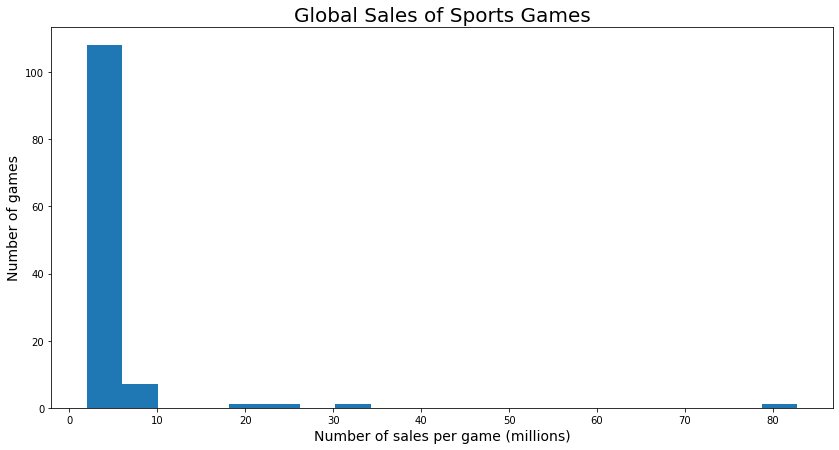

In [18]:
sports_sales = games[games['Genre']== 'Sports']['Global_Sales']
index_sports = sports_sales.gt(ufence['Sports'])
sports_sales[index_sports].hist(bins=20,grid=False,figsize=(14,7));
plt.xlabel('Number of sales per game (millions)',size=14);
plt.ylabel('Number of games',size=14);
plt.title('Global Sales of Sports Games',size=20);

----

f.) Create a plot of Global Sales with a line for the following platforms per year.
- 2600, NES, SNES, GEN, N64, GC, WII, PS, PS2, PS3, PS4, X360, XB, XOne

----


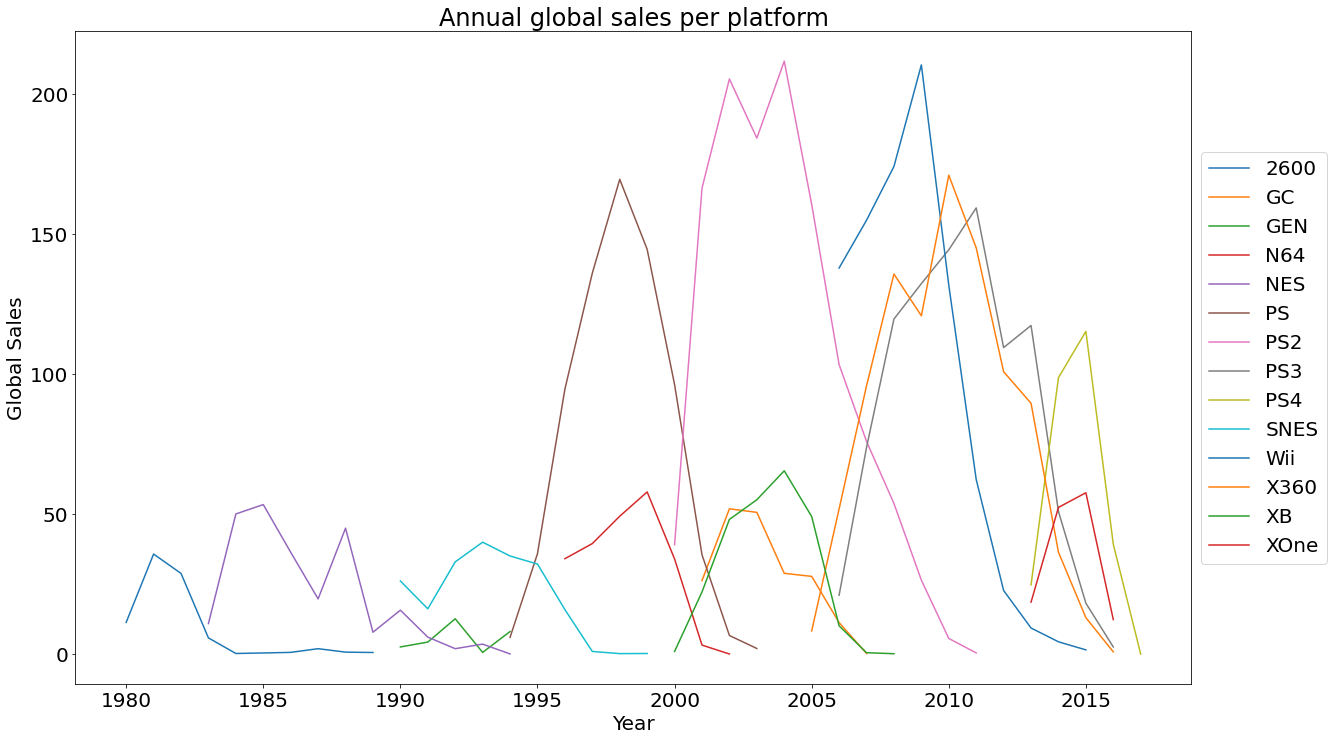

In [19]:
plt.rcParams.update({'font.size': 20})
consoles = ['2600', 'NES', 'SNES', 'GEN', 'N64', 'GC', 'Wii', 'PS', 'PS2', 'PS3', 'PS4', 'X360', 'XB', 'XOne']
filtered_games = games[games['Platform'].isin(consoles)]
plot = filtered_games.loc[:,('Platform','Year','Global_Sales')].groupby(['Year','Platform'], as_index = False).sum()
plot.set_index("Year", inplace=True)
plot.groupby("Platform")["Global_Sales"].plot(legend=True, xlabel="Year", ylabel="Global Sales", figsize=(20,12));
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5));
plt.title('Annual global sales per platform');